In [16]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
spins = 64
P_plus_sample = 0
field_start = 0.0
field_stop = 4.5
field_steps = 5000
H = np.linspace(field_start, field_stop, field_steps)
h = 2

In [18]:
dos_dir = "C:/Construct/DOS/dos" + str(spins) + "/"
H = np.linspace(field_start, field_stop, field_steps)
P_plus = np.array([])
J_sum = np.array([])
file_count = 0
max_gem_size = 0
arr_of_files = np.array([])
for file in os.listdir(dos_dir):
    file = dos_dir + file
    arr_of_files = np.append(arr_of_files, file)
    N = int(open(file).readlines()[0].rstrip())
    J_sum = np.append(J_sum, int(open(file).readlines()[2].rstrip()))
    P_plus = np.append(P_plus, (2 * N * (N - 1) + J_sum[file_count]) / (4 * N * (N - 1)))
    file_count += 1
idx = P_plus.argsort()
J_sum = J_sum[idx]
P_plus = P_plus[idx]
arr_of_files = arr_of_files[idx]

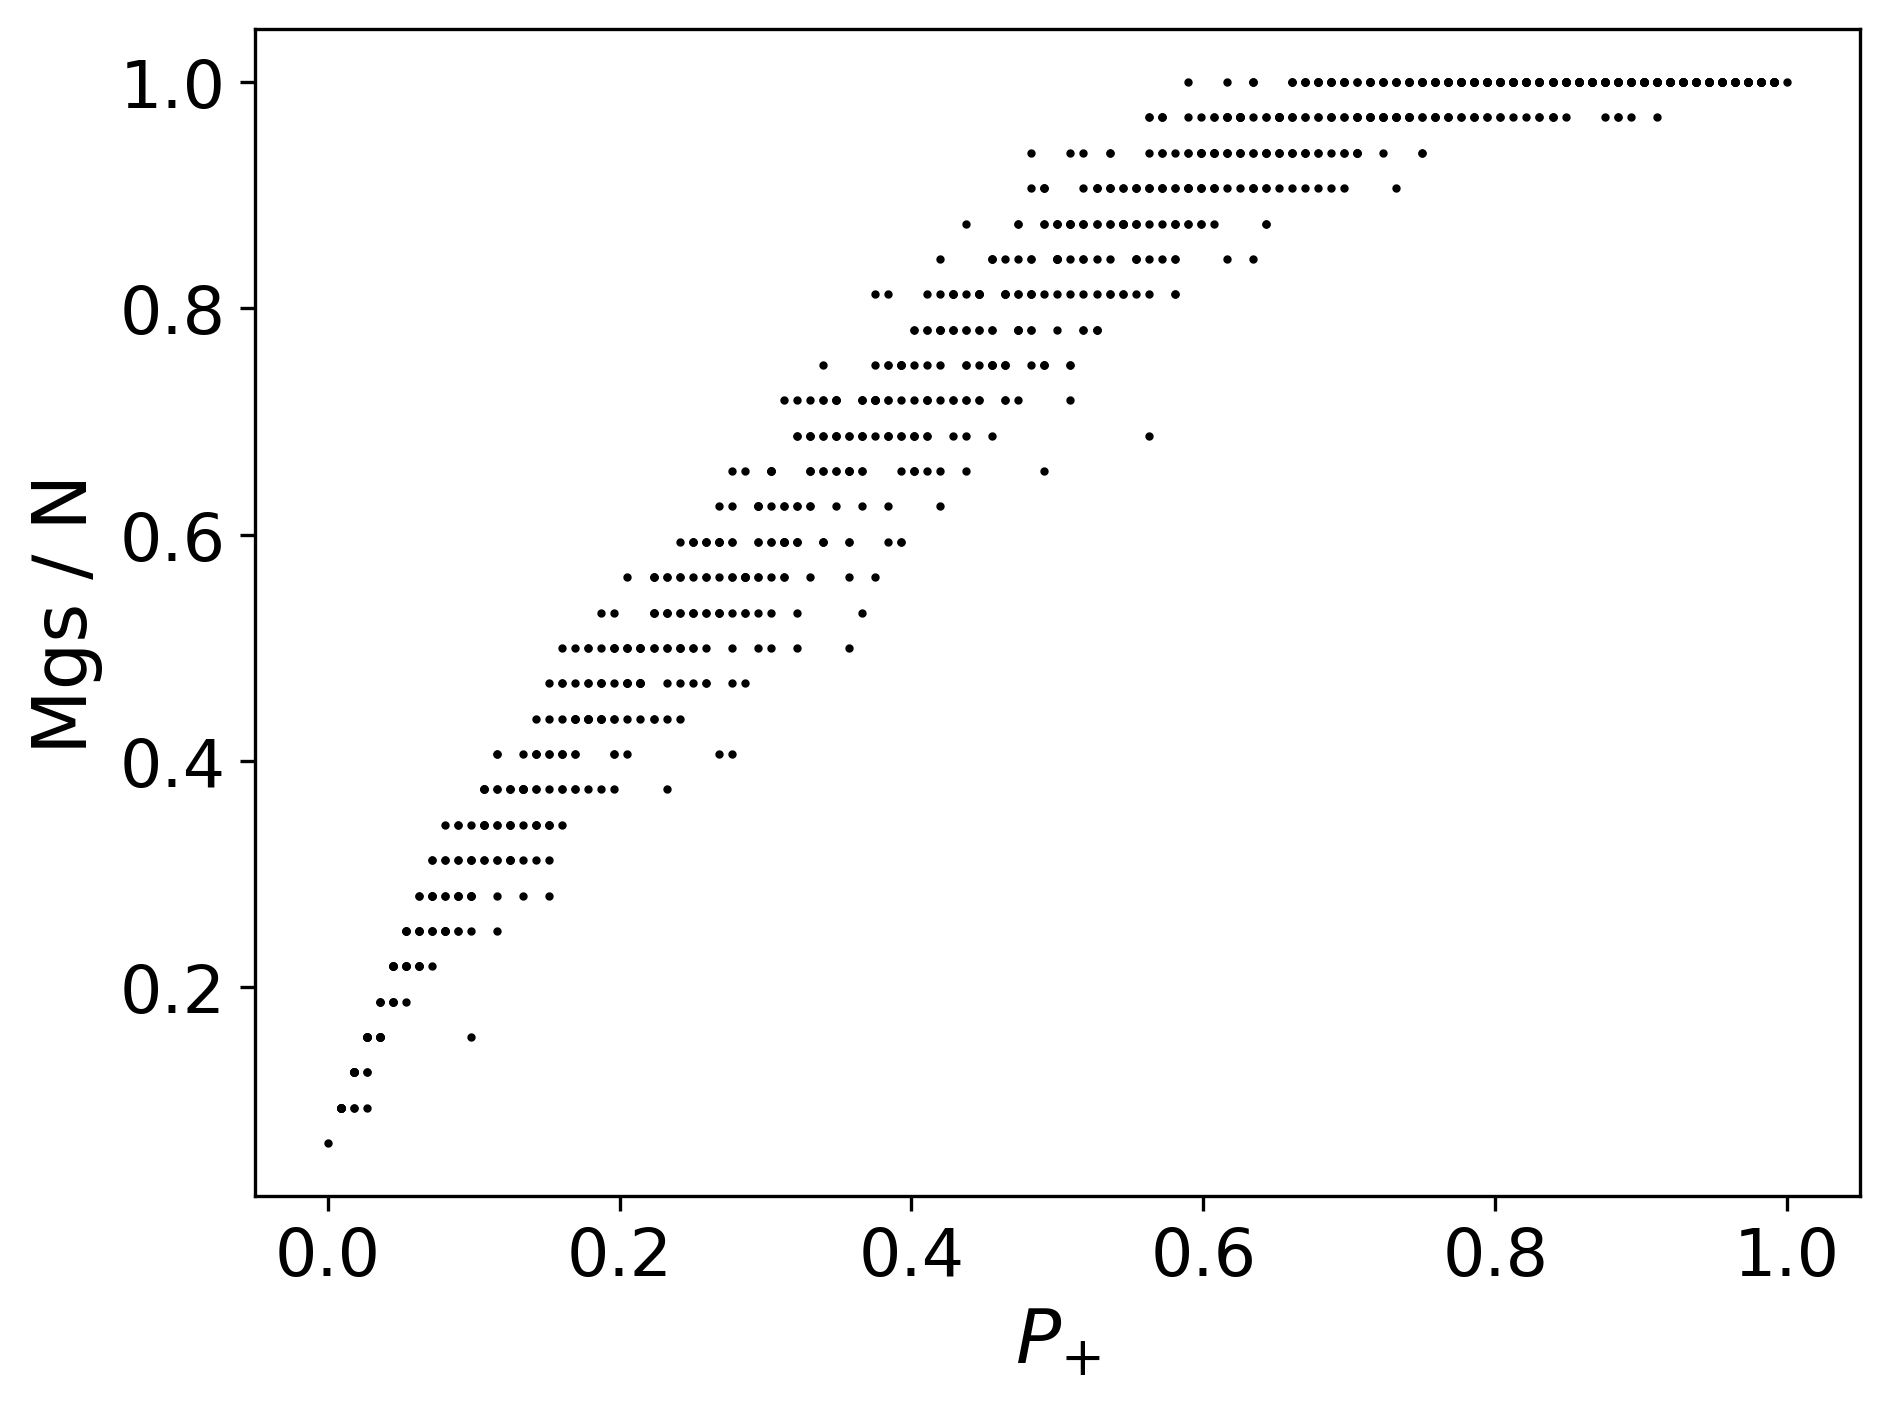

In [19]:
plt.figure(dpi=300)
for indx in range(len(arr_of_files)):
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Eh = E - M * h
    Egs_idx = np.argwhere(Eh <= np.min(Eh) * 0.9999)
    plt.scatter(P_plus[indx], np.max((M[Egs_idx]) / (N * N)), color='black', s=1)
plt.xlabel("$P_{+}$", fontsize=18)
plt.ylabel("Mgs / N", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
#plt.savefig("../../Mgs(P+)_H" + str(h) + ".eps", format='eps', dpi=300)
plt.show()

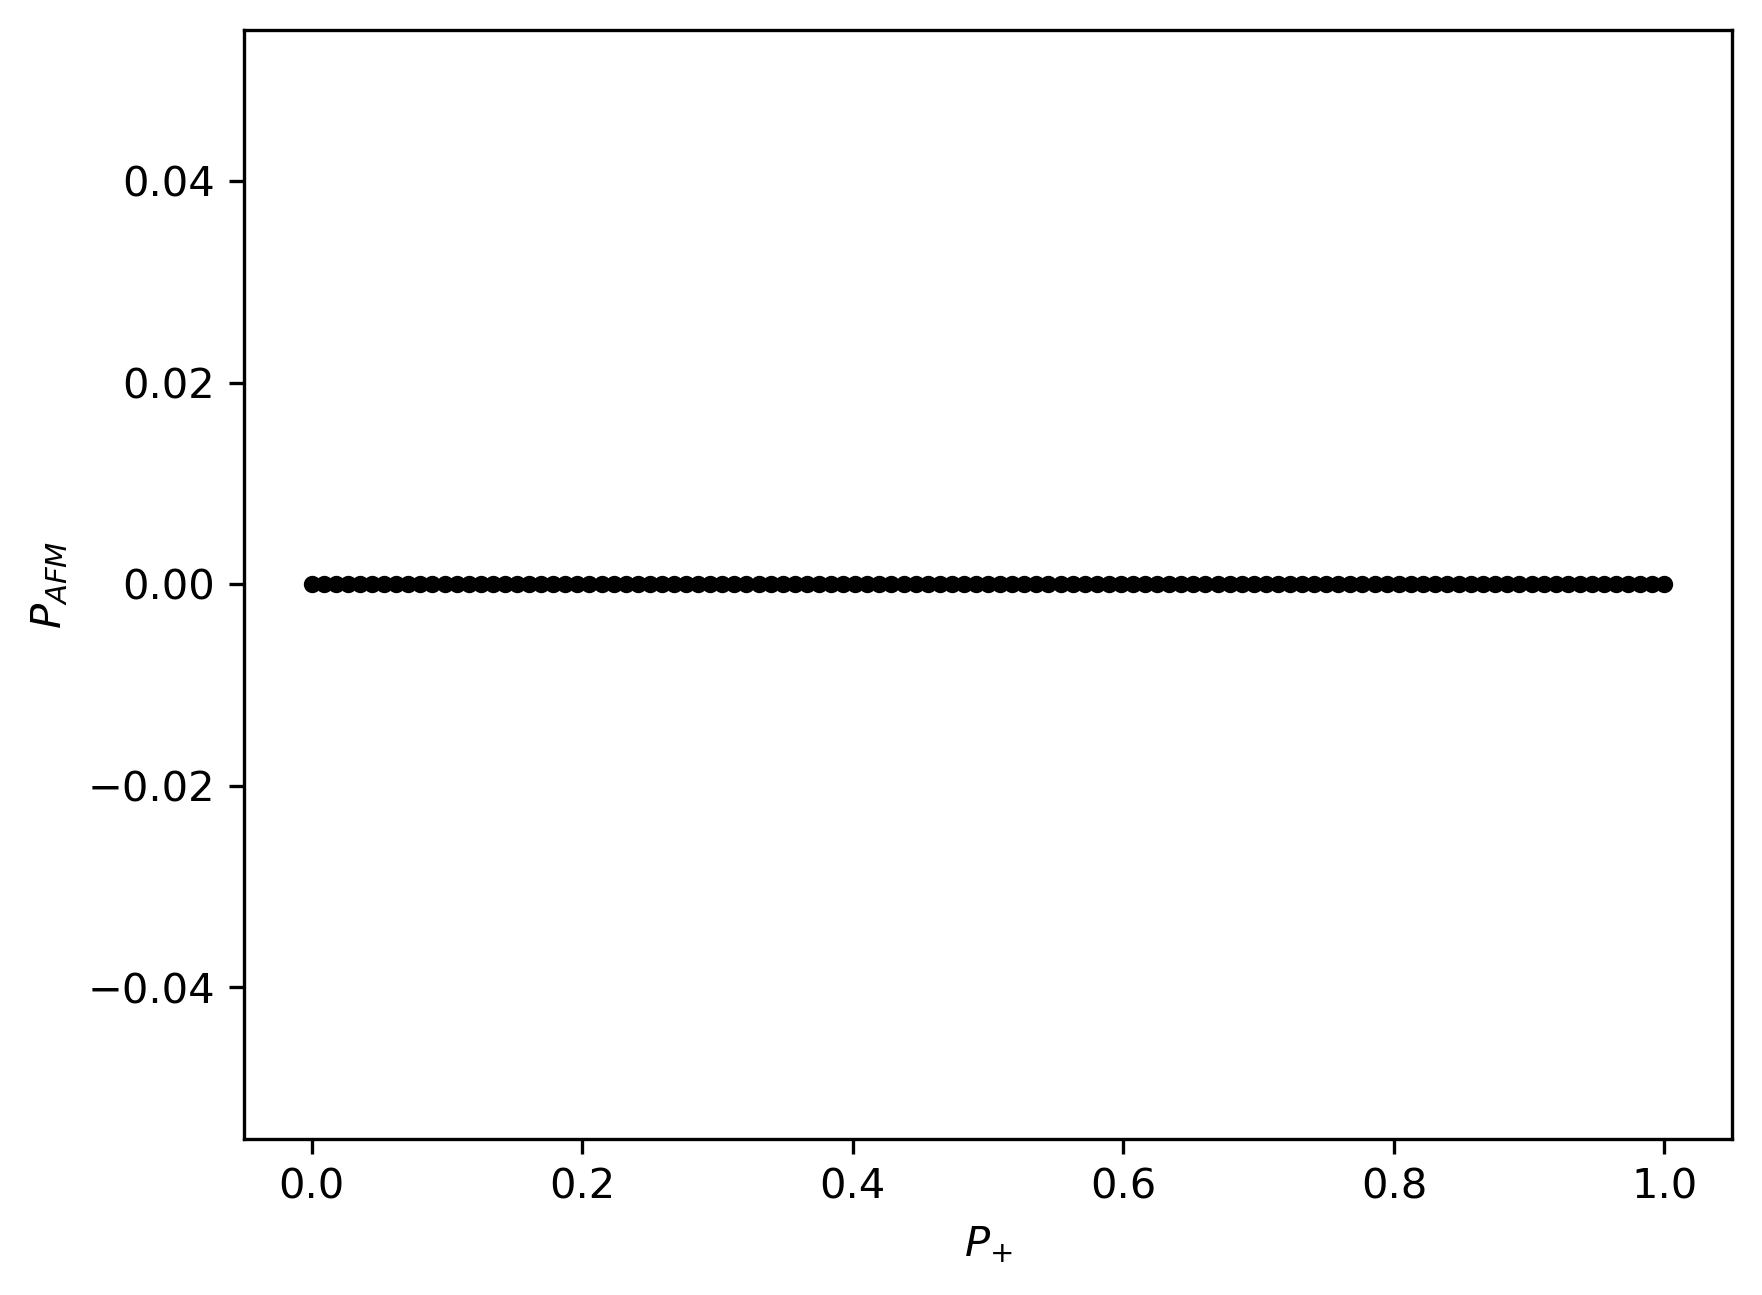

In [20]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Eh = E - M * h
    Egs_idx = np.argwhere(Eh <= np.min(Eh) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    prob = np.sum(pMgs == 0) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_{AFM}$")
#plt.savefig("../../P_AFM_Mmax.eps", format='eps', dpi=300)
plt.show()

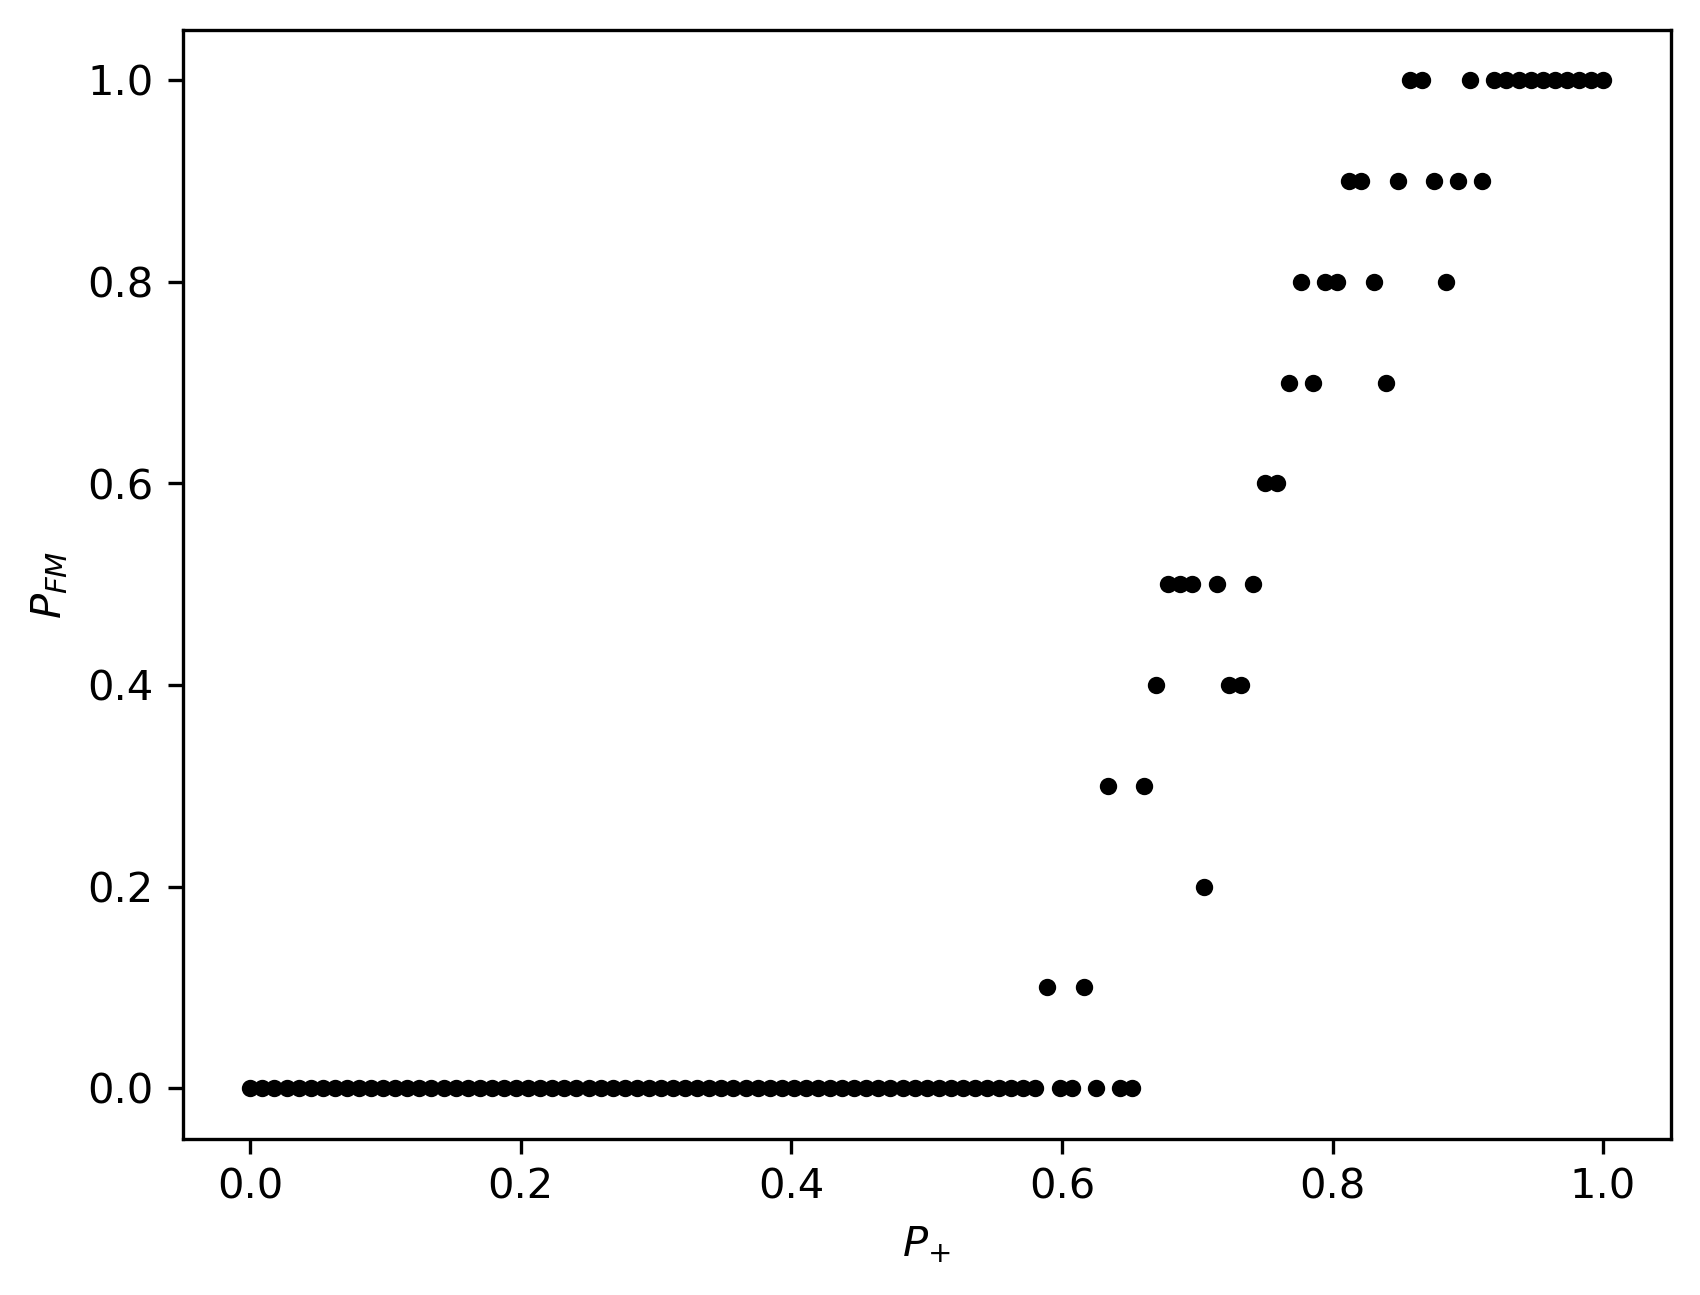

In [21]:
plt.figure(dpi=300)
P_plus_sample = 0
idxs = [i for i, x in enumerate(P_plus) if x >= P_plus_sample]
P_plus_local = P_plus[idxs]
Mgs = []
for indx in idxs:
    file = arr_of_files[indx]
    gem = np.loadtxt(open(file), skiprows=4).T
    G = gem[0]
    E = gem[1]
    M = gem[2]
    Eh = E - M * h
    Egs_idx = np.argwhere(Eh <= np.min(Eh) * 0.9999)
    Mgs.append(np.max((M[Egs_idx]) / (N * N)))
    #plt.scatter(P_plus[indx], Mgs[indx-1], color='black', s=1)
Mgs = np.array(Mgs)
P_unique = np.unique(P_plus_local)
for P_u in P_unique:
    mask = P_plus_local == P_u
    pMgs = Mgs[mask]
    prob = np.sum(pMgs == 1) / len(pMgs)
    plt.scatter(P_u, prob, color='black', s=10)
plt.xlabel("$P_{+}$")
plt.ylabel("$P_{FM}$")
#plt.savefig("../../P_FM_Mmax.eps", format='eps', dpi=300)
plt.show()

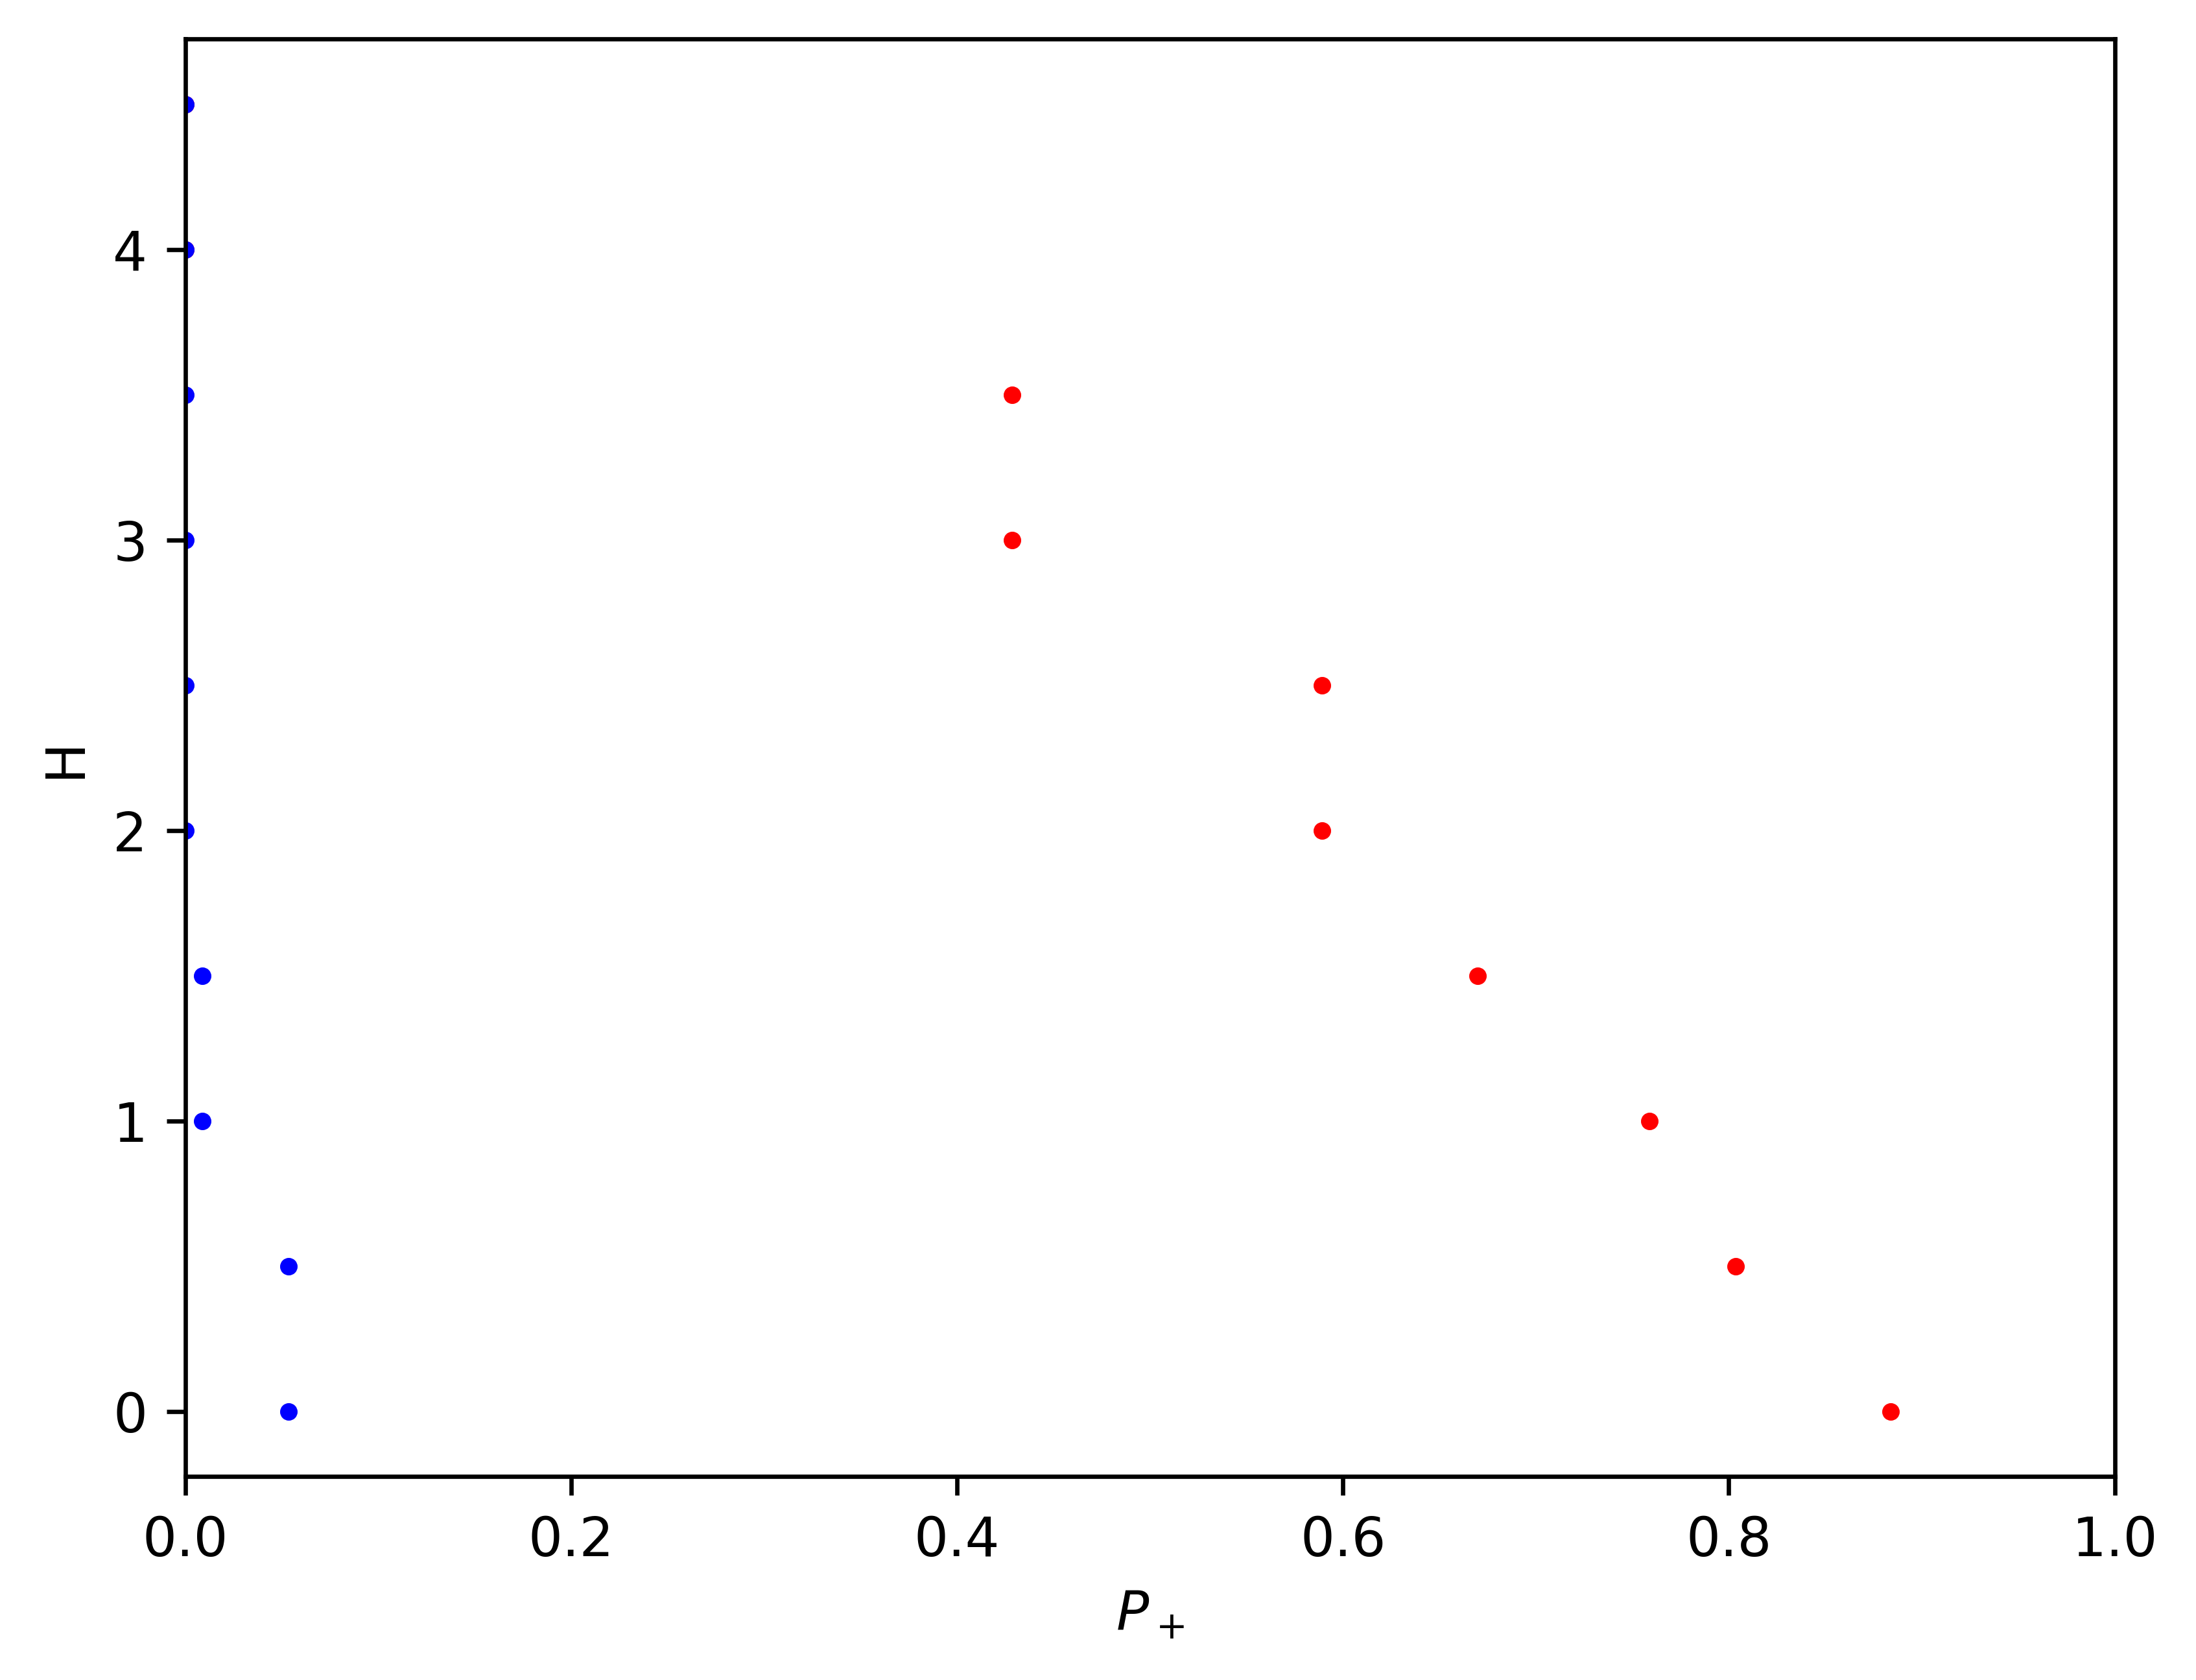

In [22]:
plt.figure(dpi=600)
for h in H:
    checkFM = True
    FM_p = 1
    AFM_p = 0
    previousAFM = 0
    for indx in range(len(arr_of_files)):
        file = arr_of_files[indx]
        gem = np.loadtxt(open(file), skiprows=4).T
        G = gem[0]
        E = gem[1]
        M = gem[2]
        Eh = E - M * h
        Egs_idx = np.argwhere(Eh <= np.min(Eh) * 0.9999)
        maxMgs = np.max((M[Egs_idx]) / (N * N))
        if maxMgs == 1 and checkFM == True:
            FM_p = P_plus[indx]
            checkFM = False
        if maxMgs == 0 and previousAFM == 0:
            AFM_p = P_plus[indx]
        previousAFM = maxMgs
    plt.scatter(FM_p, h, color='red', s=5)
    plt.scatter(AFM_p, h, color='blue', s=5)
plt.ylabel("H")
plt.xlabel("$P_+$")
plt.xlim(0, 1)
#plt.savefig("../../P+_afm_fm(H).eps", format='eps', dpi=300)
plt.show()

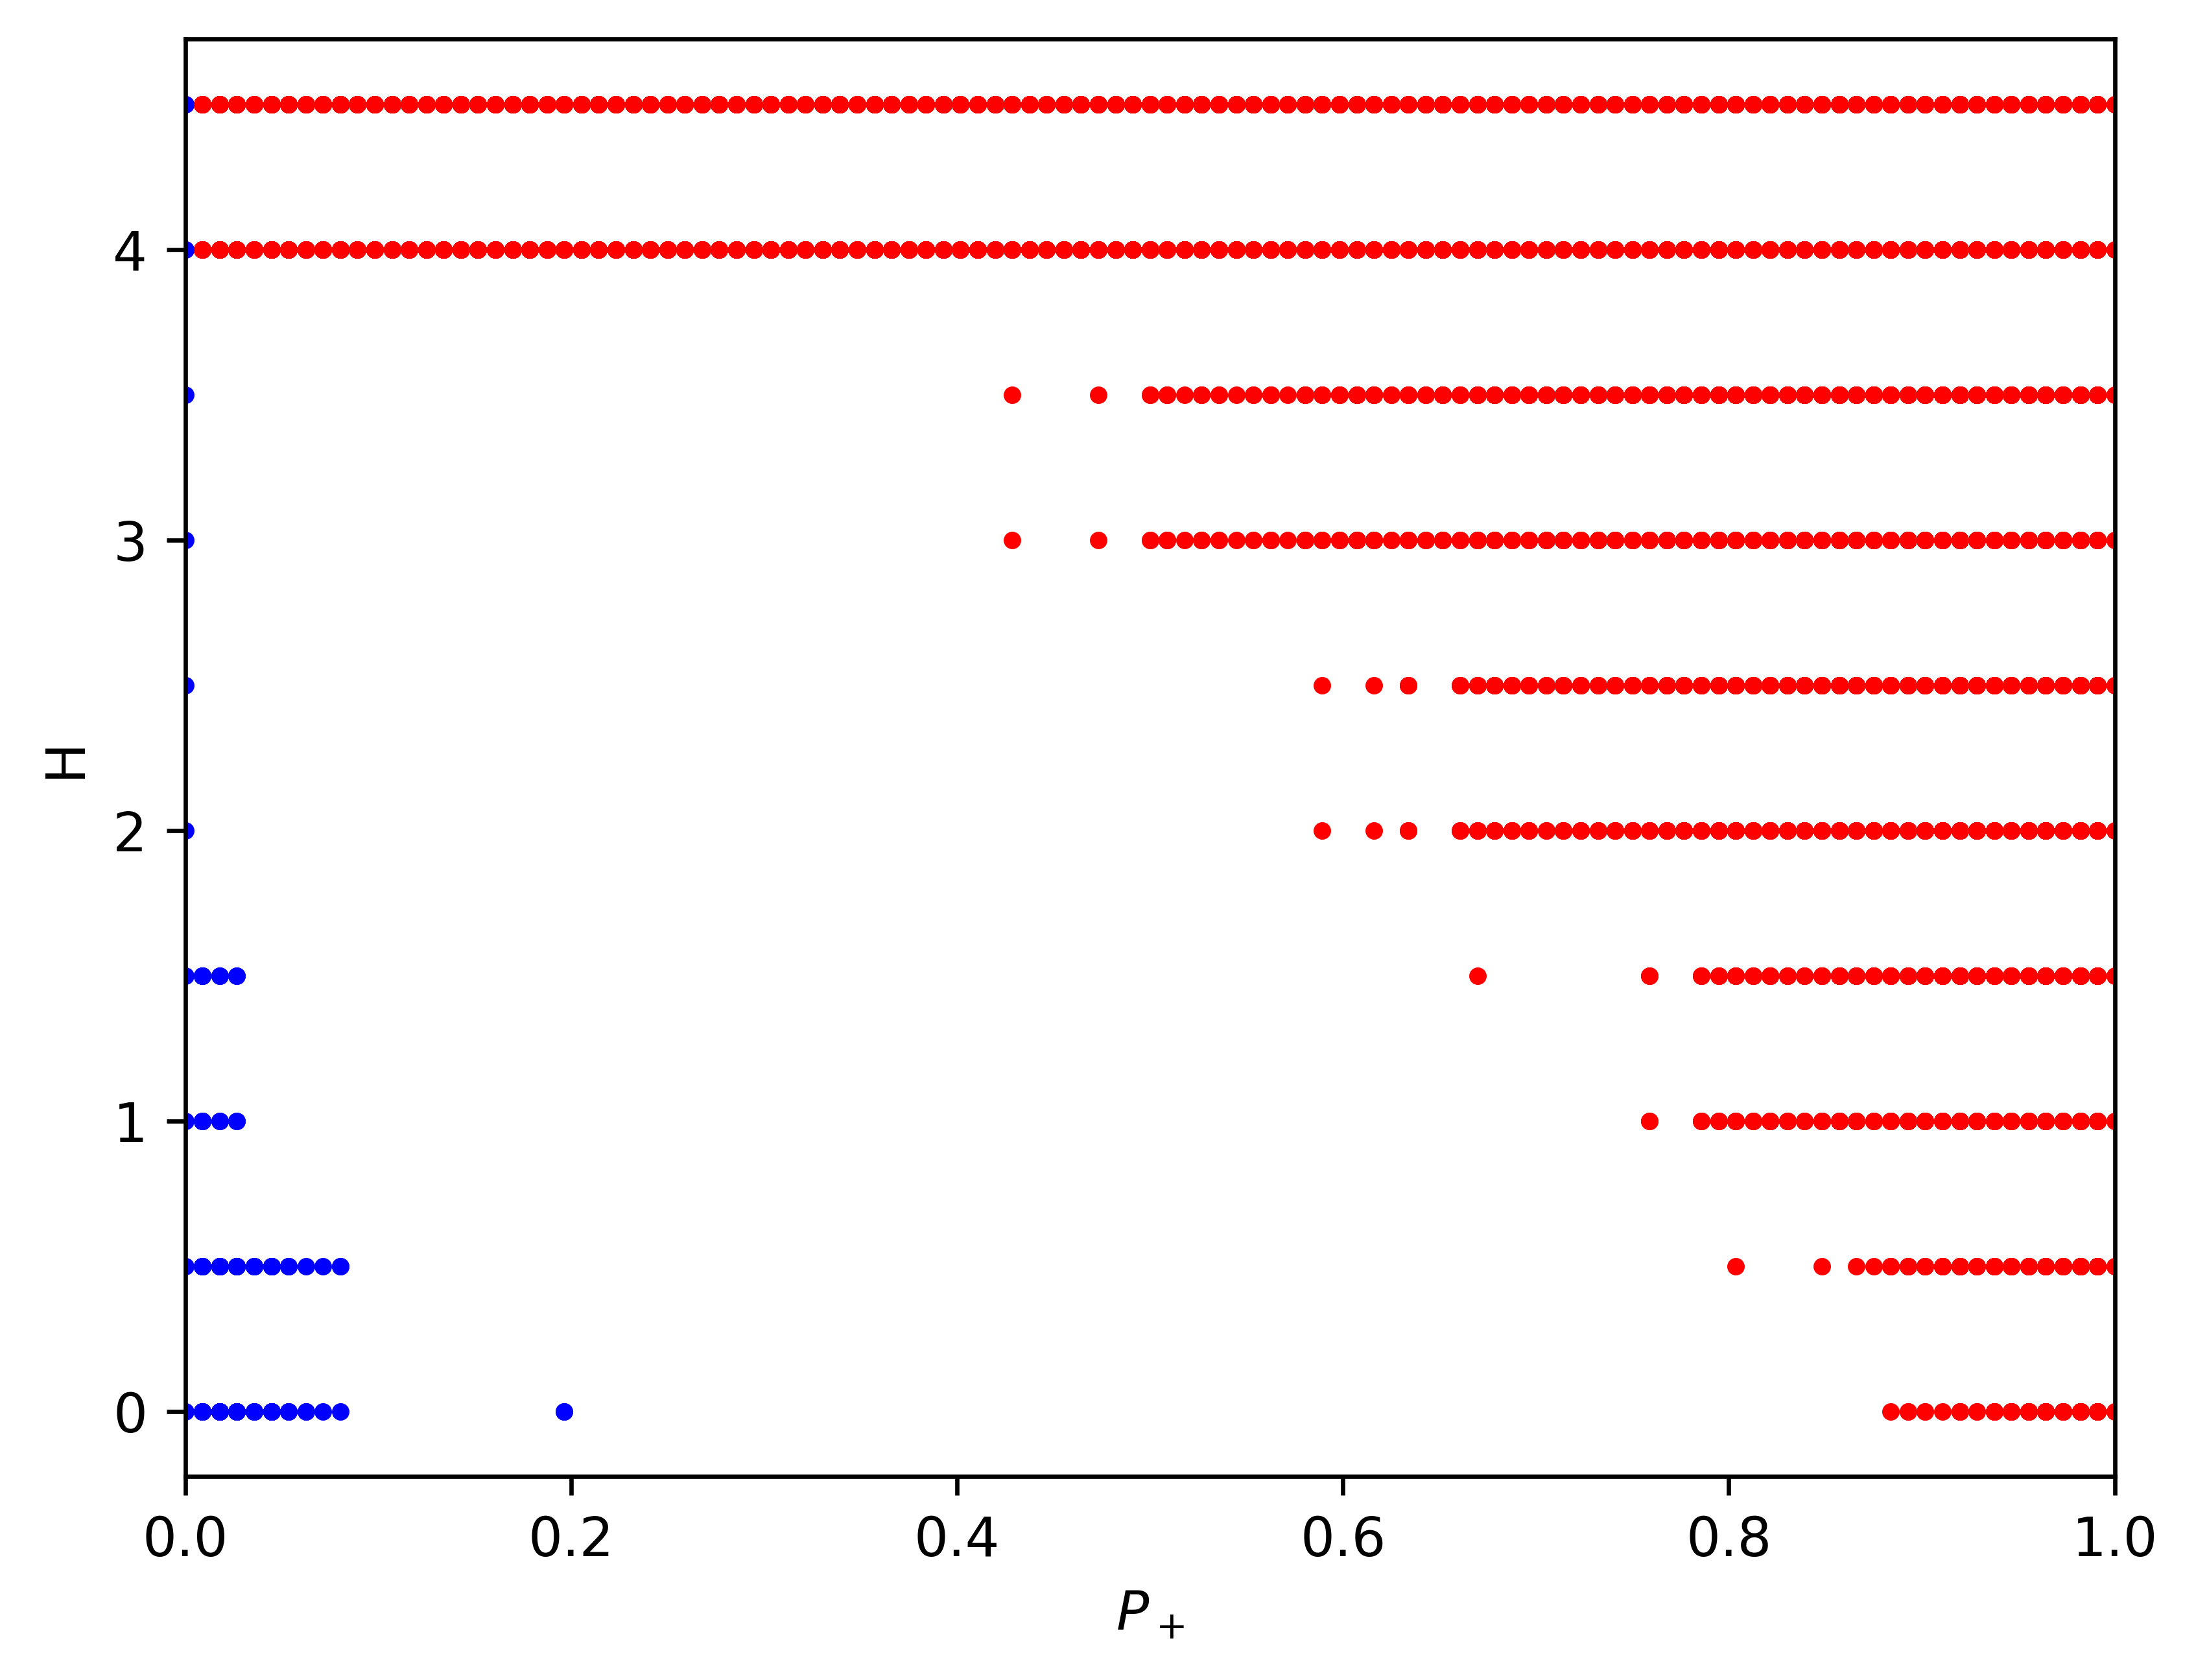

In [23]:
plt.figure(dpi=600)
for h in H:
    checkFM = True
    FM_p = 1
    AFM_p = 0
    previousAFM = 0
    for indx in range(len(arr_of_files)):
        file = arr_of_files[indx]
        gem = np.loadtxt(open(file), skiprows=4).T
        G = gem[0]
        E = gem[1]
        M = gem[2]
        Eh = E - M * h
        Egs_idx = np.argwhere(Eh <= np.min(Eh) * 0.9999)
        maxMgs = np.max((M[Egs_idx]) / (N * N))
        if maxMgs == 1:
            plt.scatter(P_plus[indx], h, color='red', s=5)
            FM_p = P_plus[indx]
            checkFM = False
        if maxMgs == 0:
            plt.scatter(P_plus[indx], h, color='blue', s=5)
            AFM_p = P_plus[indx]
        previousAFM = maxMgs
    plt.scatter(FM_p, h, color='red', s=5)
    plt.scatter(AFM_p, h, color='blue', s=5)
plt.ylabel("H")
plt.xlabel("$P_+$")
plt.xlim(0, 1)
#plt.savefig("../../P+_afm_fm(H).eps", format='eps', dpi=300)
plt.show()